In [3]:
!pip install torchvision
!pip install pandas seaborn matplotlib torch torchvision
!pip install kagglehub

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms

In [5]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device


'cpu'

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

c:\Users\jinuj\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\jinuj\.cache\kagglehub\datasets\vipoooool\new-plant-diseases-dataset\versions\2


In [7]:
from pathlib import Path
# data_path = Path('/content/vipoooool/new-plant-diseases-dataset/versions/2')
image_path = '/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)'
train_dir = "/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir = '/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = Path("/Users/jinuj/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test")

In [8]:
train_data = datasets.ImageFolder(root=train_dir,transform=transforms.ToTensor())
valid_data = datasets.ImageFolder(root=valid_dir,transform=transforms.ToTensor())

In [9]:
class_names = train_data.classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
class PlantDiseaseNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels = 3,out_channels = 32,kernel_size =3,padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels = 32,out_channels =64 , kernel_size = 3,padding =1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,padding =1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels = 128,out_channels=256,kernel_size = 3,padding = 1 ),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.block5 = nn.Sequential(
            nn.Conv2d(in_channels=256,out_channels=256,kernel_size = 3,padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = 8*8*256,out_features = 1024),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=1024,out_features = len(class_names))
        )
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.classifier(x)
        return x

In [11]:
saved_model = PlantDiseaseNN().to(device)
saved_model.load_state_dict(torch.load('model/model.pth', map_location=torch.device('cpu')))
saved_model.eval()

PlantDiseaseNN(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1

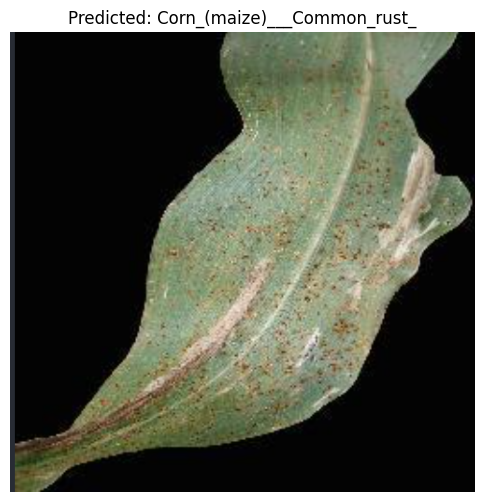

In [12]:
import torch
import os
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


mean = [0.485, 0.456, 0.406]  
std = [0.229, 0.224, 0.225]


image_size = (256, 256)
preprocess = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

 # Replace with actual class names

# udjast the path image path
image_path = "image copy.png"

# here the image gets loaded ok
img = Image.open(image_path).convert('RGB')

# Preprocess the image
img_tensor = preprocess(img).unsqueeze(0).to(device)  # Add batch dimension

# Get prediction
saved_model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predictions = saved_model(img_tensor)

# Get predicted class
predicted_class_idx = torch.argmax(predictions, dim=1).item()
predicted_label = class_names[predicted_class_idx]  # Map index to class name

# Display the image with prediction
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
